# C-OPS data processing for C-HARRIER MISSIONS
## Processing for individual CAPS files

This script allows for fast and easy quicklooks of C-OPS radiometry data for data efficacy checks. The following script processes individual C-OPS CAPS files which provide the dark current readings for subsequent dark corrections of collected radiometry data.

In [17]:
## IMPORT NECESSARY LIBRARIES 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib.dates as mdates

### Inputs

In the following cell, input which radiometric sensor (es, li, or lt),  the path to the folder containing the CAPS files for a particular day (path), the actual filename you wish to process (fname), and the path to where you would like the figure saved (outpath). 

In [18]:
sensor = 'es'
path = '/Users/jakravit/OneDrive - NASA/C-HARRIER_2021_C-AIR/C-AIR_CAPS/today20211019ground/'
fname = 'CAP_L_211019_173152_URC.csv'
outpath = '/Users/jakravit/Desktop/Caps_figs/'

### Read Data

The following cell reads the data and splits into the three sensors.

In [19]:
## Read in file and separate data into sensors
file = path+fname
data = pd.read_csv(file, sep=',', encoding='ISO-8859-1', index_col='DateTimeUTC')
sensors = {'es': data.iloc[:,5:24],
           'li': data.iloc[:,24:43],
           'lt': data.iloc[:,43:]}
name = fname[:-4]

### Plot Data

The following plots the individual sensor data as a function of time. Radiance is on the left y-axis, and degrees for pitch and roll are on the right y-axis. Mean and standard deviation for each radiometer channel is provided in the legend.

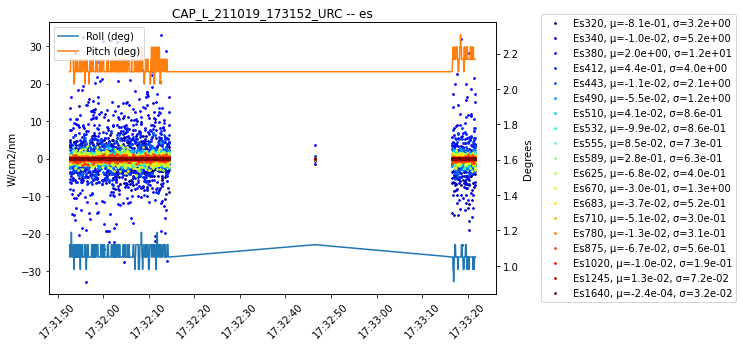

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, sensors[sensor].shape[1]))))
means = []
stds = []
labels = []
for i,b in enumerate(sensors[sensor].columns):
    data.index = pd.to_datetime(data.index)
    ax.scatter(data.index,data[b], marker='o',s=3)
    mean = data[b].mean()
    std = data[b].std()
    means.append(mean)
    stds.append(std)
    labels.append('{}, \u03BC={:.1e}, \u03C3={:.1e}'.format(b.split(' ')[0], mean, std))
ax.legend(labels,bbox_to_anchor=(1.09, 1.05),fontsize='medium')
ax.set_title('{} -- {}'.format(name,sensor))
ax.set_ylabel('W/cm2/nm')
plt.xticks(rotation=45)

## twin axis to plot adjacent pitch and roll
# ax2 = ax.twinx()
# ax2.plot(data.iloc[:,3], label='Roll (deg)') # roll
# ax2.plot(data.iloc[:,4], label='Pitch (deg)') # pitch
# ax2.set_ylabel('Degrees')
# ax2.legend(loc='upper left')

## save figure
fig.savefig(outpath+'{}_{}'.format(name,sensor),bbox_inches='tight',dpi=300)